## Clean and organize basketball player statistics from scraped data.
Preliminary quesiton: how are height and weight related?
Secondary question: do performance metrics correlate with age/experience/height/weight? 
I don't know ANYTHING about basketball so lets try Height?

In [15]:
#relevant imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [16]:
players_df = pd.read_pickle('basketballplayers.pkl')

In [17]:
players_df.head()

,displayName,firstName,heightFeet,heightInches,isAllStar,jersey,lastName,orderChar,playerUrl,pos,posExpanded,teamData.city,teamData.nickname,teamData.tricode,teamData.urlName,weightPounds,age,years_in_nba
personId,,,,,,,,,,,,,,,,,,
203518,"Abrines, Alex",Alex,6,6,False,8,Abrines,A,/players/alex/abrines/203518,G,Guard,Oklahoma City,Thunder,OKC,thunder,190,25.0,2.0
203112,"Acy, Quincy",Quincy,6,7,False,13,Acy,A,/players/quincy/acy/203112,F,Forward,Brooklyn,Nets,BKN,nets,240,27.0,6.0
1629121,"Adams, Jaylen",Jaylen,6,2,False,,Adams,A,/players/jaylen/adams/1629121,G,Guard,Atlanta,Hawks,ATL,hawks,190,22.0,0.0
203500,"Adams, Steven",Steven,7,0,False,12,Adams,A,/players/steven/adams/203500,C,Center,Oklahoma City,Thunder,OKC,thunder,255,25.0,5.0
1628389,"Adebayo, Bam",Bam,6,10,False,13,Adebayo,A,/players/bam/adebayo/1628389,C-F,Center-Forward,Miami,Heat,MIA,heat,255,21.0,1.0


In [18]:
#convert to numeric and create new column called height
players_df.replace(to_replace = '-', value = np.nan, inplace = True)
players_df['heightFeet'] = pd.to_numeric(players_df.heightFeet)
players_df['heightInches'] = pd.to_numeric(players_df.heightInches)
players_df['height'] = players_df.heightFeet * 12 + players_df.heightInches

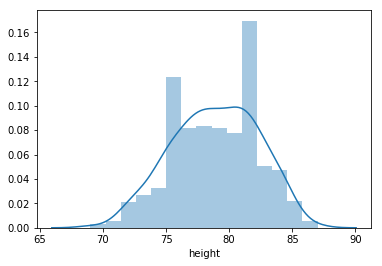

In [19]:
#distribution of heights of basketball plauers
sns.distplot(players_df.height.dropna())

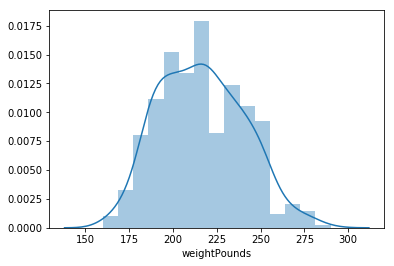

In [20]:
players_df['weightPounds'] = pd.to_numeric(players_df.weightPounds)
sns.distplot(players_df.weightPounds.dropna())



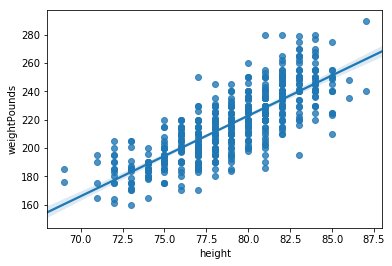

In [24]:
#check height and weight correlation
sns.regplot(x = "height", y = "weightPounds", data = players_df)

In [37]:
#get basketball players stats file and relevant columns. what columns measure performance
stats_df = pd.read_pickle('basketballstats.pkl')

In [38]:
for columnname in stats_df: print(columnname)

_internal.eventName
_internal.pubDateTime
_internal.xslt
league.sacramento.stats.careerSummary.apg
league.sacramento.stats.careerSummary.assists
league.sacramento.stats.careerSummary.blocks
league.sacramento.stats.careerSummary.bpg
league.sacramento.stats.careerSummary.dd2
league.sacramento.stats.careerSummary.defReb
league.sacramento.stats.careerSummary.fga
league.sacramento.stats.careerSummary.fgm
league.sacramento.stats.careerSummary.fgp
league.sacramento.stats.careerSummary.fta
league.sacramento.stats.careerSummary.ftm
league.sacramento.stats.careerSummary.ftp
league.sacramento.stats.careerSummary.gamesPlayed
league.sacramento.stats.careerSummary.gamesStarted
league.sacramento.stats.careerSummary.min
league.sacramento.stats.careerSummary.mpg
league.sacramento.stats.careerSummary.offReb
league.sacramento.stats.careerSummary.pFouls
league.sacramento.stats.careerSummary.plusMinus
league.sacramento.stats.careerSummary.points
league.sacramento.stats.careerSummary.ppg
league.sacramento.s

In [39]:
#index stats by player_ID
stats_df.set_index(['player_ID'], inplace = True)
points = stats_df['league.standard.stats.careerSummary.points']
#convert to numerics
points = pd.to_numeric(points)

In [41]:
#create a new dataframe with players_ID as index, height and career points
points.head()

player_ID
203518      759.0
203112     1625.0
1629121      -1.0
203500     3399.0
1628389      37.0
Name: league.standard.stats.careerSummary.points, dtype: float64

In [42]:
#rename index to ID in both players_df and points
points.index.rename('ID',inplace = True)
players_df.index.rename('ID',inplace = True)

In [45]:
#add points to players df
players_df = players_df.join(points)

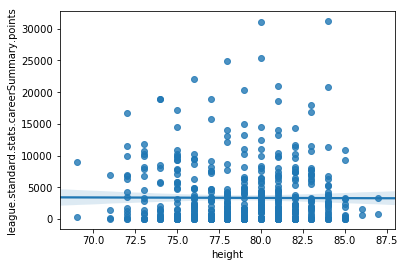

In [48]:
#is their a correlation between height and career points? Apparently not really!
sns.regplot(x = 'height', y = 'league.standard.stats.careerSummary.points', data = players_df)

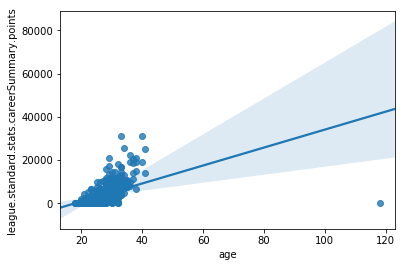

In [49]:
#what about points and years in the NBA?
sns.regplot(x = 'age', y = 'league.standard.stats.careerSummary.points', data = players_df)

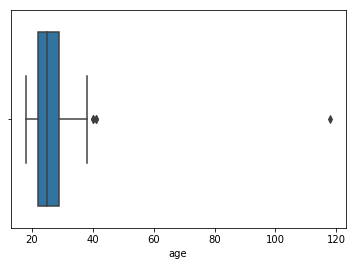

In [52]:
sns.boxplot(players_df.age.dropna())

In [56]:
players_df.loc[players_df.age >50, 'age'] = np.nan

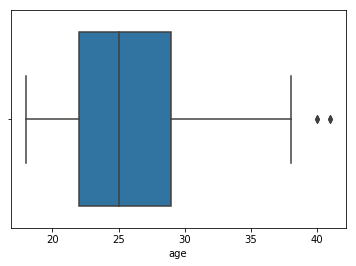

In [57]:
sns.boxplot(players_df.age.dropna())

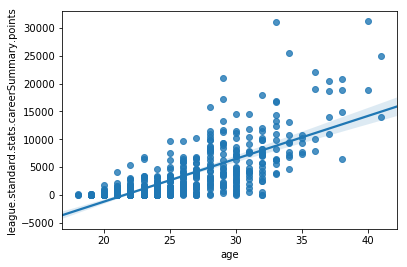

In [58]:
#what about points and years in the NBA?
sns.regplot(x = 'age', y = 'league.standard.stats.careerSummary.points', data = players_df)